# COVID-19 Dataset – Exploratory Data Analysis (EDA)

Focus:
- Feature distributions
- Missing (null) values



## 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

real_path = 'Real_Datasets/covid19.csv'
df = pd.read_csv(real_path)

print('Dataset shape:', df.shape)
df.head()

Dataset shape: (5644, 111)


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Data Types

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


## 3. Missing Values

In [3]:
missing_abs = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'missing_count': missing_abs,
    'missing_percent': missing_pct
})

total_cells = df.shape[0] * df.shape[1]
total_missing = df.isna().sum().sum()

missing_percentage = (total_missing / total_cells) * 100
print("total missing values:", missing_percentage)

missing_df[missing_df.missing_count > 0].head(20)

total missing values: 88.06003026414082


,missing_count,missing_percent
Urine - Sugar,5644,100.000000
Mycoplasma pneumoniae,5644,100.000000
Partial thromboplastin time (PTT),5644,100.000000
"Prothrombin time (PT), Activity",5644,100.000000
D-Dimer,5644,100.000000
Fio2 (venous blood gas analysis),5643,99.982282
Urine - Nitrite,5643,99.982282
Vitamin B12,5641,99.946846
Lipase dosage,5636,99.858257
Albumin,5631,99.769667


## 4. Missing Values Plot

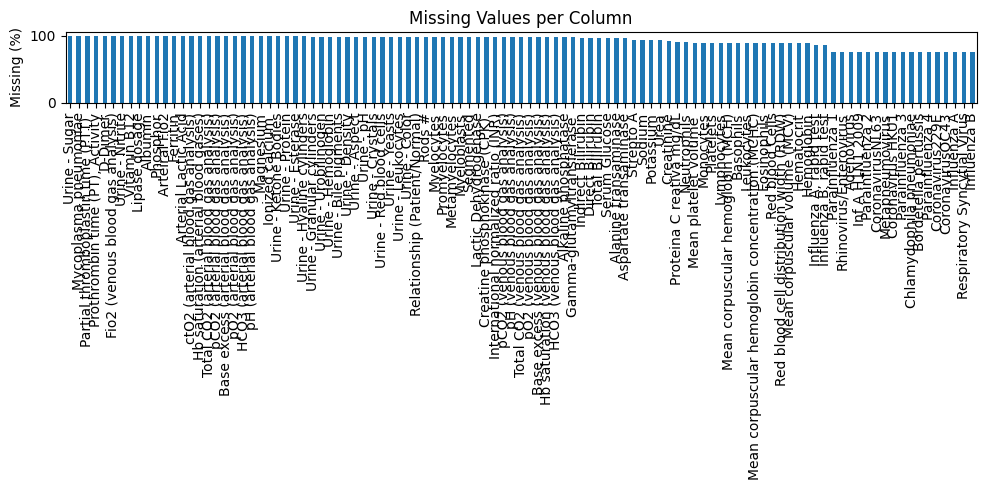

In [4]:
plt.figure(figsize=(10,5))
missing_pct[missing_pct > 0].plot(kind='bar')
plt.ylabel('Missing (%)')
plt.title('Missing Values per Column')
plt.tight_layout()
plt.show()

In [5]:
df_filtered = df[df.notna().sum(axis=1) >= 10]
print("Original shape:", df.shape)
print("Filtered shape:", df_filtered.shape)

print("Rows removed:", df.shape[0] - df_filtered.shape[0])

x = 30  # threshold in percent

missing_pct = df_filtered.isna().mean() * 100
df_filtered2 = df_filtered.loc[:, missing_pct <= x]

removed = set(df_filtered.columns) - set(df_filtered2.columns)
print("Dropped columns:", removed)

print("Filtered2 shape:", df_filtered2.shape)


Original shape: (5644, 111)
Filtered shape: (1601, 111)
Rows removed: 4043
Dropped columns: {'pO2 (venous blood gas analysis)', 'Partial thromboplastin time\xa0(PTT)\xa0', 'Urine - Protein', 'Hemoglobin', 'Influenza A, rapid test', 'HCO3 (venous blood gas analysis)', 'Lymphocytes', 'Urine - Crystals', 'Creatine phosphokinase\xa0(CPK)\xa0', 'Total CO2 (venous blood gas analysis)', 'Urine - Granular cylinders', 'D-Dimer', 'Arteiral Fio2', 'Urea', 'Mean corpuscular volume (MCV)', 'Prothrombin time (PT), Activity', 'Potassium', 'Urine - Nitrite', 'Segmented', 'Serum Glucose', 'Hb saturation (arterial blood gases)', 'Urine - Ketone Bodies', 'Alkaline phosphatase', 'HCO3 (arterial blood gas analysis)', 'Urine - Urobilinogen', 'Urine - Esterase', 'Basophils', 'Mean corpuscular hemoglobin concentration\xa0(MCHC)', 'Lactic Dehydrogenase', 'Creatinine', 'Alanine transaminase', 'Phosphor', 'Hematocrit', 'Arterial Lactic Acid', 'Fio2 (venous blood gas analysis)', 'Ferritin', 'Mean platelet volume 

## 5. Numeric Distributions

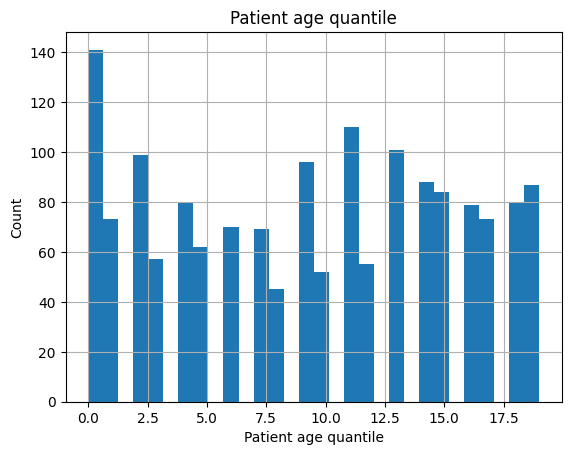

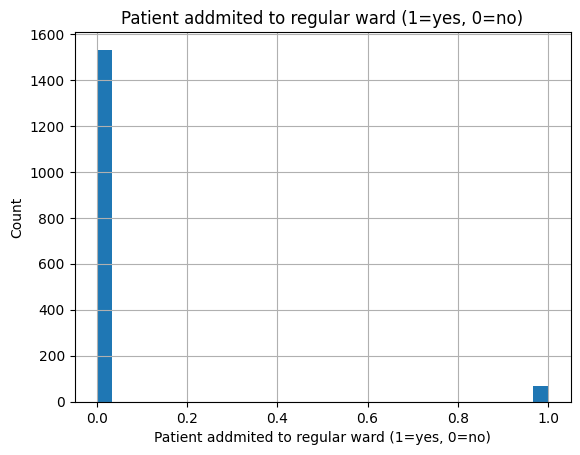

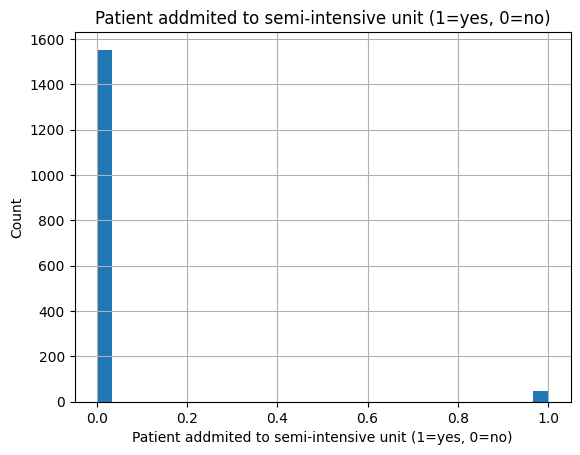

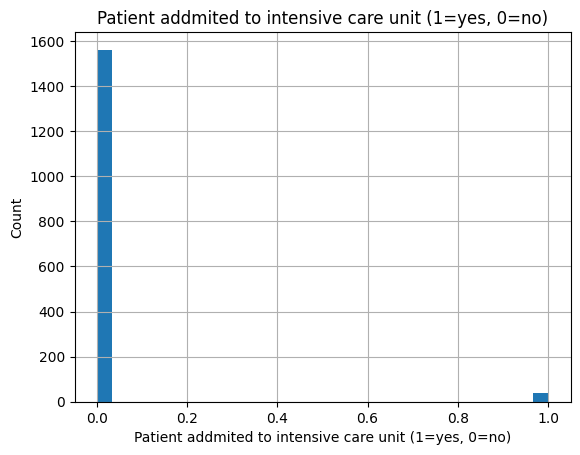

In [6]:
num_cols = df_filtered2.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure()
    df_filtered2[col].dropna().hist(bins=30)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## 6. Categorical Distributions

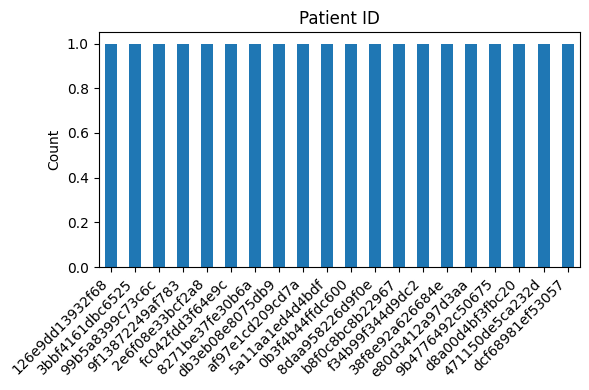

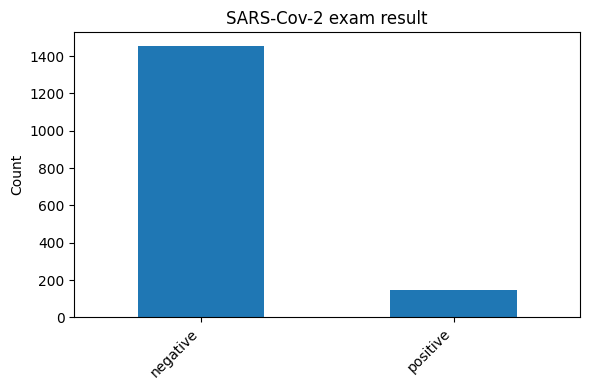

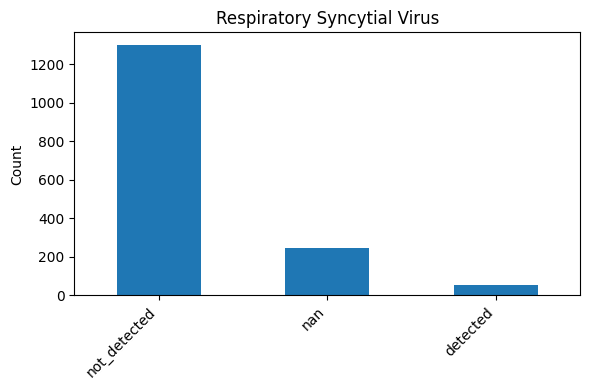

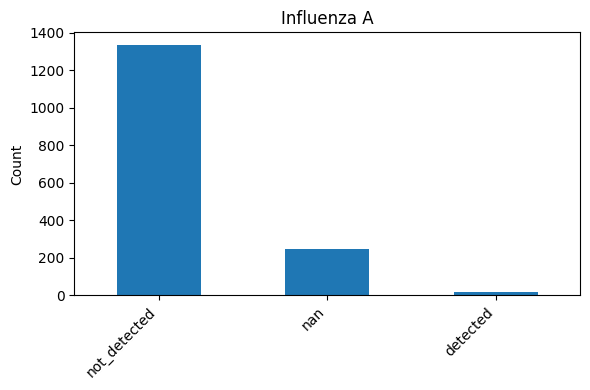

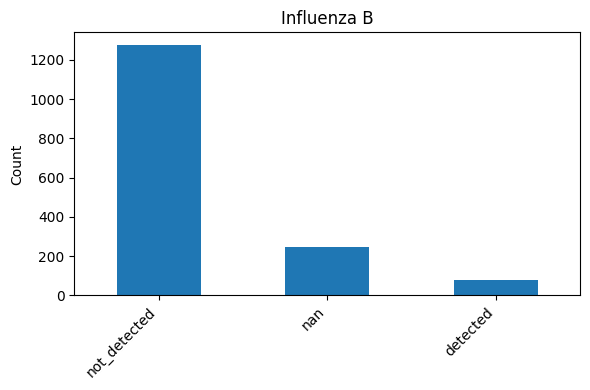

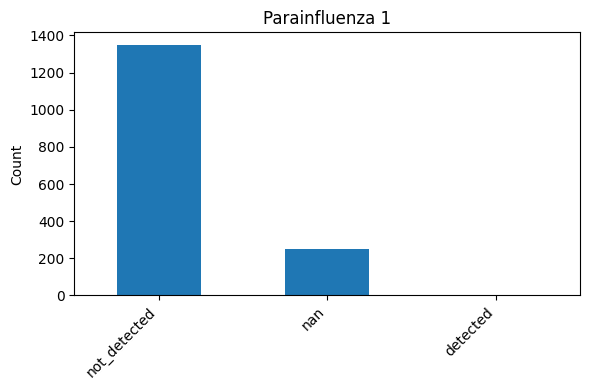

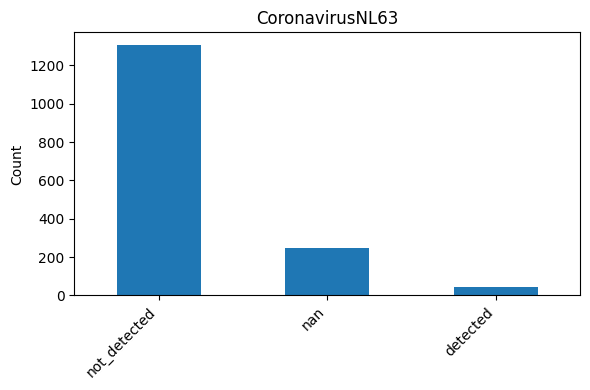

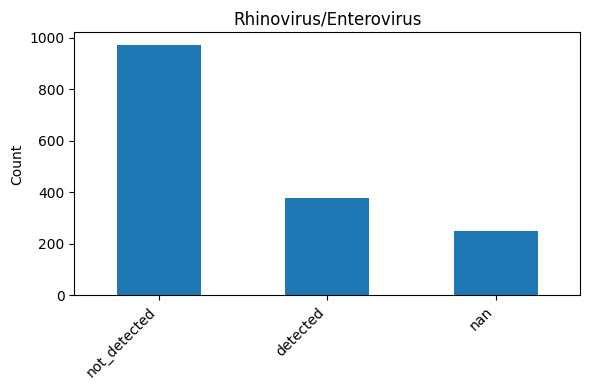

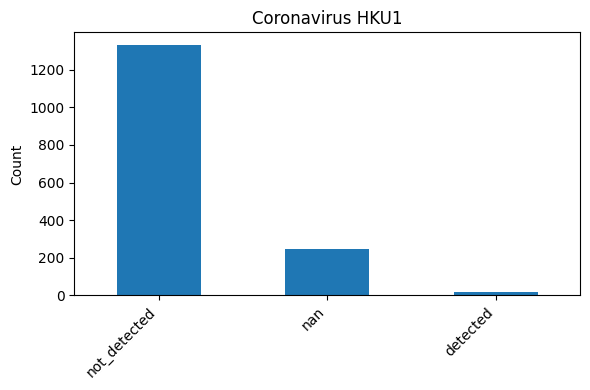

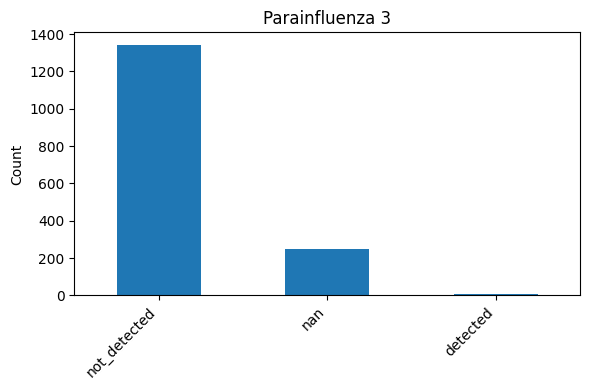

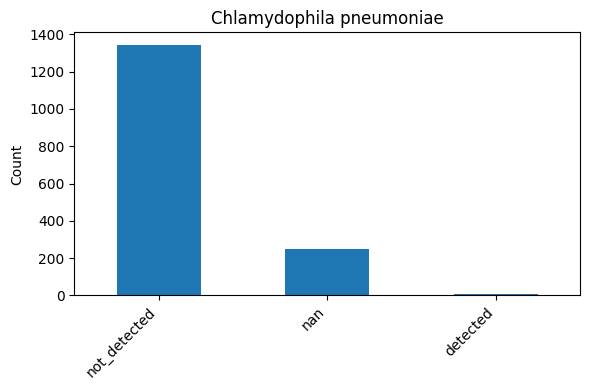

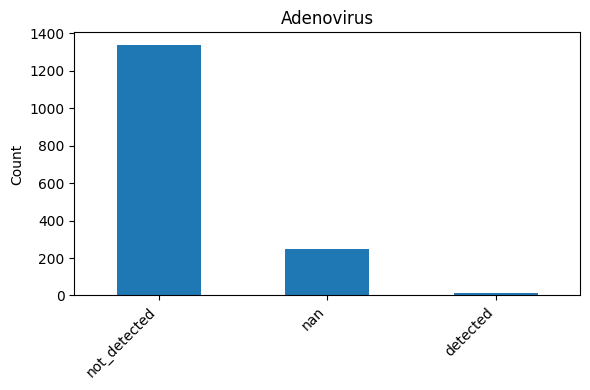

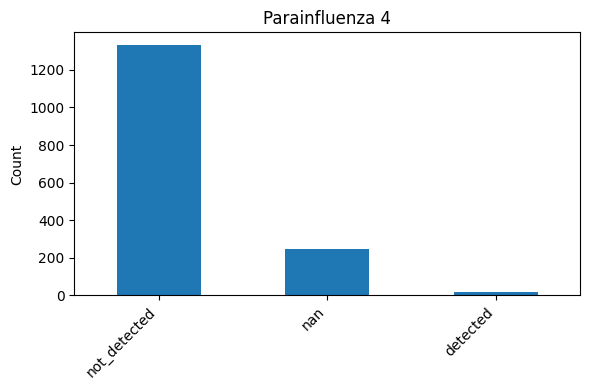

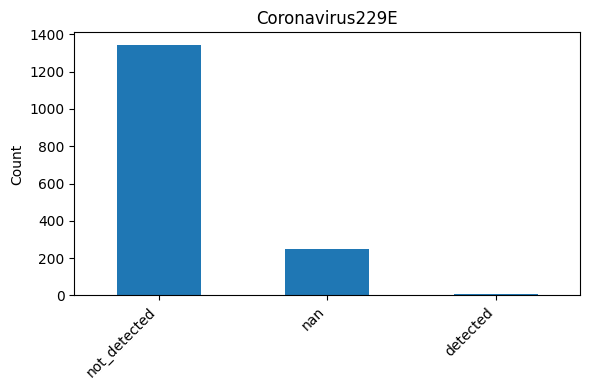

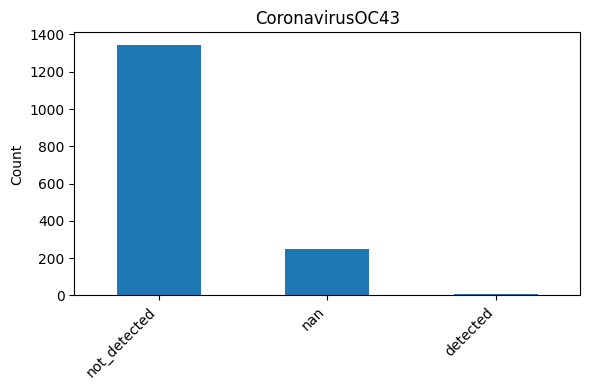

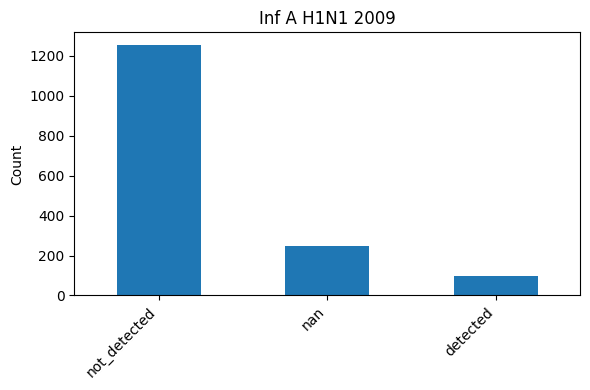

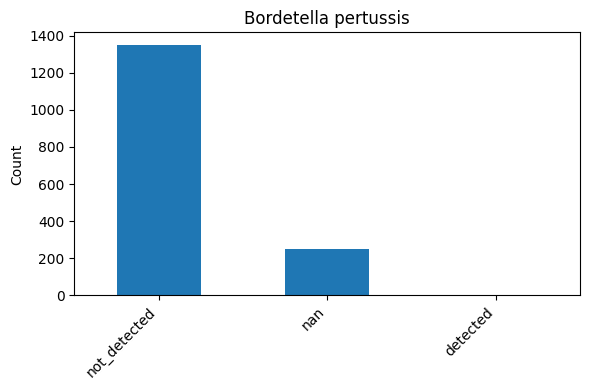

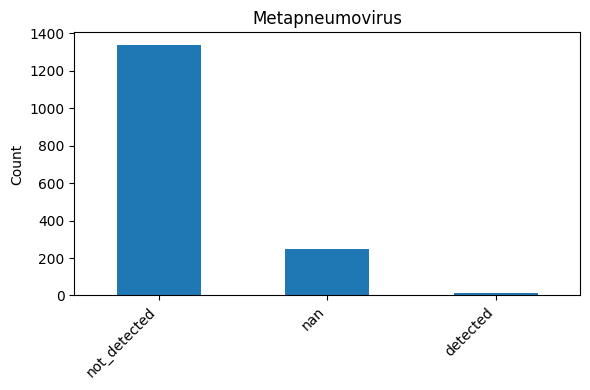

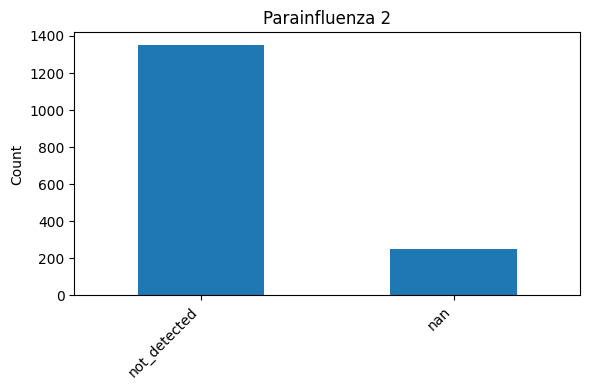

In [7]:
cat_cols = df_filtered2.select_dtypes(exclude=[np.number]).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df_filtered2[col].value_counts(dropna=False).head(20).plot(kind='bar')
    plt.title(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 7. Notes
- Columns with high missingness may need imputation or removal
- Highly skewed distributions may require transformation before GAN training